In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import numpy.linalg as nla
import pandas as pnd
import sklearn.covariance as sklc

import sys
sys.path.append("C:/Users/pierr/OneDrive/Bureau/Dossier en haut à droite/Stage MIA 2023/Codes/Libraries")
import Fonctions as fc
import timeit as ti

In [2]:
N_tab = list(2**np.arange(4,10))
D_tab = list(2**np.arange(3,9))
C_tab = list(2**np.arange(0,6))
L_tab = list(2**np.arange(0,6))

N1 = 128
N2 = 512
D1 = 64
D2 = 8
L1 = 4
C1 = 4

eps = 0.001
nb_tries = 20
p = 0.1

# Simulation des données

#### Variation selon N

In [3]:
N_data_sets_1 = [[] for N in N_tab]
N_data_sets_2 = [[] for N in N_tab]
N_data_sets_3 = [[] for N in N_tab]

for N in N_tab :
    k = N_tab.index(N)
    for t in range(nb_tries):
        
        #PCA/PPCA
        W, mu, sigma2 = fc.sim_param(D2,L1,s3=0.5)
        Z, Y = fc.sim_data(W,mu,sigma2,N)
        N_data_sets_1[k].append([Z,Y])
        
        #RCA
        W, V, mu, sigma2 = fc.sim_param_cov(D2,L1,C1,s4=0.5)
        Z, Y, X = fc.sim_data_cov(W,V,mu,sigma2,N)
        N_data_sets_2[k].append([Z,Y,X])
        
        #RCA LRPSI
        la = rd.normal(0,1)**2
        W, Lambda, sigma2 = fc.sim_param_LRPSI(D2,L1,s2=0.5,la=la)
        Z, Y, X = fc.sim_data_LRPSI(W,Lambda,N,sigma2)
        N_data_sets_3[k].append([Z,Y,X])

#### Variation selon D

In [4]:
D_data_sets_1 = [[] for D in D_tab]
D_data_sets_2 = [[] for D in D_tab]
D_data_sets_3 = [[] for D in D_tab]

for D in D_tab :
    k = D_tab.index(D)
    for t in range(nb_tries):
        
        #PCA/PPCA
        W, mu, sigma2 = fc.sim_param(D,L1,s3=0.5)
        Z, Y = fc.sim_data(W,mu,sigma2,N2)
        D_data_sets_1[k].append([Z,Y])
        
        #RCA
        W, V, mu, sigma2 = fc.sim_param_cov(D,L1,C1,s4=0.5)
        Z, Y, X = fc.sim_data_cov(W,V,mu,sigma2,N2)
        D_data_sets_2[k].append([Z,Y,X])
        
        #RCA LRPSI
        la = rd.normal(0,1)**2
        W, Lambda, sigma2 = fc.sim_param_LRPSI(D,L1,s2=0.5,la=la)
        Z, Y, X = fc.sim_data_LRPSI(W,Lambda,N2,sigma2)
        D_data_sets_3[k].append([Z,Y,X])

#### Variation selon L

In [5]:
L_data_sets_1 = [[] for L in L_tab]
L_data_sets_2 = [[] for L in L_tab]
L_data_sets_3 = [[] for L in L_tab]

for L in L_tab :
    k = L_tab.index(L)
    for t in range(nb_tries):
        
        #PCA/PPCA
        W, mu, sigma2 = fc.sim_param(D1,L,s3=0.5)
        Z, Y = fc.sim_data(W,mu,sigma2,N1)
        L_data_sets_1[k].append([Z,Y])
        
        #RCA
        W, V, mu, sigma2 = fc.sim_param_cov(D1,L,C1,s4=0.5)
        Z, Y, X = fc.sim_data_cov(W,V,mu,sigma2,N1)
        L_data_sets_2[k].append([Z,Y,X])
        
        #RCA LRPSI
        la = rd.normal(0,1)**2
        W, Lambda, sigma2 = fc.sim_param_LRPSI(D1,L,s2=0.5,la=la)
        Z, Y, X = fc.sim_data_LRPSI(W,Lambda,N1,sigma2)
        L_data_sets_3[k].append([Z,Y,X])

#### Variation selon C

In [6]:
C_data_sets = [[] for C in C_tab]

for C in C_tab :
    k = C_tab.index(C)
    for t in range(nb_tries):
        
        #RCA
        W, V, mu, sigma2 = fc.sim_param_cov(D1,L1,C,s4=0.5)
        Z, Y, X = fc.sim_data_cov(W,V,mu,sigma2,N1)
        C_data_sets[k].append([Z,Y,X])

# Chronométrage

#### Variation selon N

In [7]:
N_PCA_timeits = [ti.timeit("[fc.PCA(N_data_sets_1["+str(n)+"][t][1],L1) for t in range(nb_tries)]",number=1,globals=globals()) for n in range(6)]


In [8]:
N_PPCA_EM_timeits = [ti.timeit("[fc.PPCA_EM(N_data_sets_1["+str(n)+"][t][1],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for n in range(6)]


In [9]:
N_PPCA_timeits = [ti.timeit("[fc.PPCA(N_data_sets_1["+str(n)+"][t][1],L1) for t in range(nb_tries)]",number=1,globals=globals()) for n in range(6)]


In [10]:
N_ML_RCA_timeits = [ti.timeit("[fc.ML_RCA(N_data_sets_2["+str(n)+"][t][1],N_data_sets_2["+str(n)+"][t][2],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for n in range(6)]


In [11]:
N_ML_RCA_2_timeits = [ti.timeit("[fc.ML_RCA_2(N_data_sets_2["+str(n)+"][t][1],N_data_sets_2["+str(n)+"][t][2],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for n in range(6)]


In [12]:
N_RCA_LRPSI_timeits = [ti.timeit("[fc.EM_RCA_LRPSI(N_data_sets_3["+str(n)+"][t][1],N_data_sets_3["+str(n)+"][t][2],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for n in range(6)]


#### Variation selon D

In [13]:
D_PCA_timeits = [ti.timeit("[fc.PCA(D_data_sets_1["+str(d)+"][t][1],L1) for t in range(nb_tries)]",number=1,globals=globals()) for d in range(6)]


In [14]:
D_PPCA_EM_timeits = [ti.timeit("[fc.PPCA_EM(D_data_sets_1["+str(d)+"][t][1],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for d in range(6)]


In [15]:
D_PPCA_timeits = [ti.timeit("[fc.PPCA(D_data_sets_1["+str(d)+"][t][1],L1) for t in range(nb_tries)]",number=1,globals=globals()) for d in range(6)]


In [16]:
D_ML_RCA_timeits = [ti.timeit("[fc.ML_RCA(D_data_sets_2["+str(d)+"][t][1],D_data_sets_2["+str(d)+"][t][2],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for d in range(6)]


In [17]:
D_ML_RCA_2_timeits = [ti.timeit("[fc.ML_RCA_2(D_data_sets_2["+str(d)+"][t][1],D_data_sets_2["+str(d)+"][t][2],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for d in range(6)]


In [18]:
D_RCA_LRPSI_timeits = [ti.timeit("[fc.EM_RCA_LRPSI(D_data_sets_3["+str(d)+"][t][1],D_data_sets_3["+str(d)+"][t][2],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for d in range(6)]


C:\Users\pierr\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2116: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:/Users/pierr/OneDrive/Bureau/Dossier en haut à droite/Stage MIA 2023/Codes/Libraries\Fonctions.py:700: RuntimeWarning: divide by zero encountered in log
  qty = np.sum(np.array([-np.log(np.abs(nla.det(Cov))) - 1/2 * np.array([y])@inv_Cov@y - la*np.sum(np.abs(Lambda)) for y in Y]))


#### Variation selon L

In [19]:
L_PCA_timeits = [ti.timeit("[fc.PCA(L_data_sets_1["+str(l)+"][t][1],L_tab["+str(l)+"]) for t in range(nb_tries)]",number=1,globals=globals()) for l in range(6)]


In [20]:
L_PPCA_EM_timeits = [ti.timeit("[fc.PPCA_EM(L_data_sets_1["+str(l)+"][t][1],L_tab["+str(l)+"],err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for l in range(6)]


In [21]:
L_PPCA_timeits = [ti.timeit("[fc.PPCA(L_data_sets_1["+str(l)+"][t][1],L_tab["+str(l)+"]) for t in range(nb_tries)]",number=1,globals=globals()) for l in range(6)]


In [22]:
L_ML_RCA_timeits = [ti.timeit("[fc.ML_RCA(L_data_sets_2["+str(l)+"][t][1],L_data_sets_2["+str(l)+"][t][2],L_tab["+str(l)+"],err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for l in range(6)]


In [23]:
L_ML_RCA_2_timeits = [ti.timeit("[fc.ML_RCA_2(L_data_sets_2["+str(l)+"][t][1],L_data_sets_2["+str(l)+"][t][2],L_tab["+str(l)+"],err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for l in range(6)]


In [24]:
L_RCA_LRPSI_timeits = [ti.timeit("[fc.EM_RCA_LRPSI(L_data_sets_3["+str(l)+"][t][1],L_data_sets_3["+str(l)+"][t][2],L_tab["+str(l)+"],err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for l in range(6)]


C:\Users\pierr\anaconda3\lib\site-packages\sklearn\covariance\_graph_lasso.py:226: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39943.5447486639, tolerance: 19068.234606009937
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\pierr\anaconda3\lib\site-packages\sklearn\covariance\_graph_lasso.py:226: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80871.95422768593, tolerance: 36045.019362198036
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\pierr\anaconda3\lib\site-packages\sklearn\covariance\_graph_lasso.py:226: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104597.00939136744, tolerance: 24981.57694544397
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\pierr\anaconda3\lib\site-packages\sklearn\covariance\_graph_lasso.py:226: Convergen

#### Variation selon C

In [25]:
C_ML_RCA_timeits = [ti.timeit("[fc.ML_RCA(C_data_sets["+str(c)+"][t][1],C_data_sets["+str(c)+"][t][2],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for c in range(6)]


In [26]:
C_ML_RCA_2_timeits = [ti.timeit("[fc.ML_RCA_2(C_data_sets["+str(c)+"][t][1],C_data_sets["+str(c)+"][t][2],L1,err=eps,tempo=False) for t in range(nb_tries)]",number=1,globals=globals()) for c in range(6)]


# Régression linéaire

In [27]:
timelists = [N_PCA_timeits, N_PPCA_EM_timeits, N_PPCA_timeits, N_ML_RCA_timeits, N_ML_RCA_2_timeits, N_RCA_LRPSI_timeits,
            D_PCA_timeits, D_PPCA_EM_timeits, D_PPCA_timeits, D_ML_RCA_timeits, D_ML_RCA_2_timeits, D_RCA_LRPSI_timeits,
            L_PCA_timeits, L_PPCA_EM_timeits, L_PPCA_timeits, L_ML_RCA_timeits, L_ML_RCA_2_timeits, L_RCA_LRPSI_timeits,
             C_ML_RCA_timeits, C_ML_RCA_2_timeits]

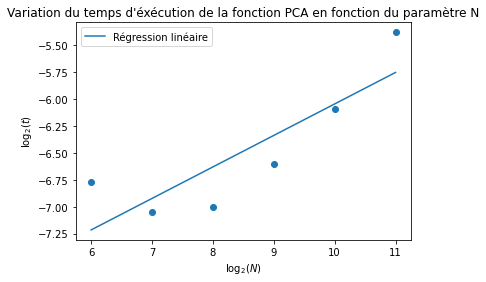

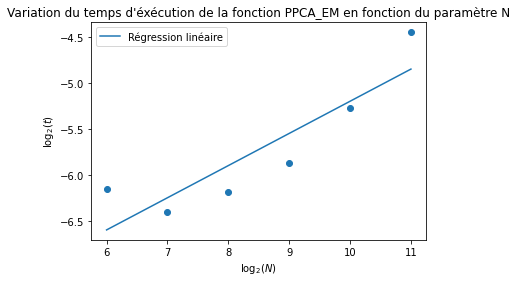

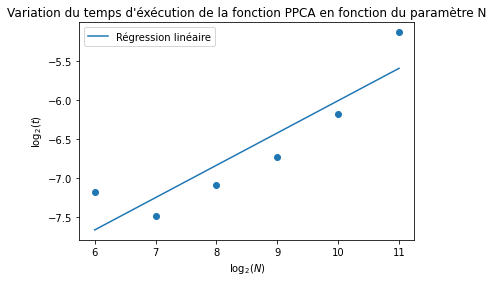

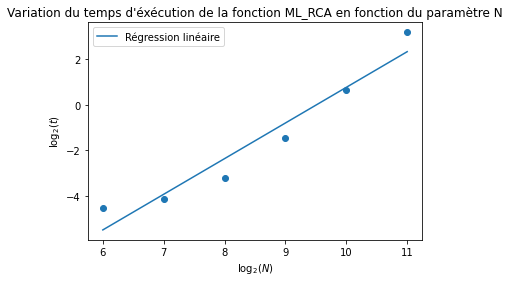

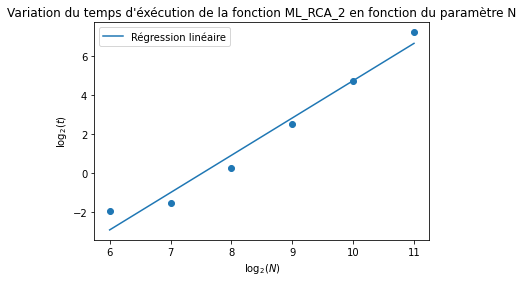

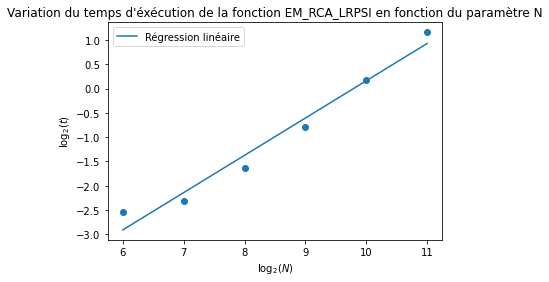

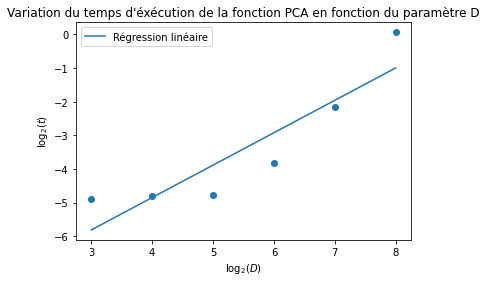

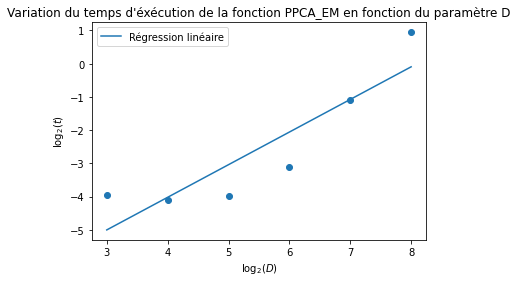

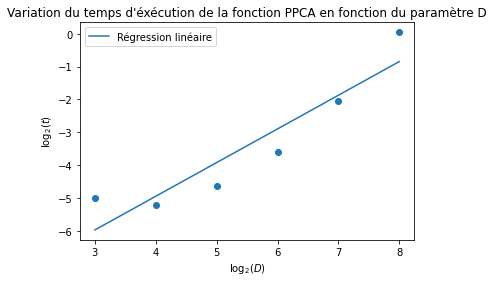

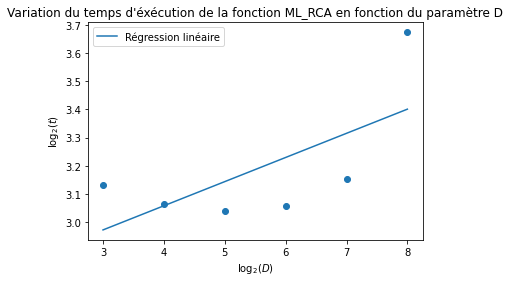

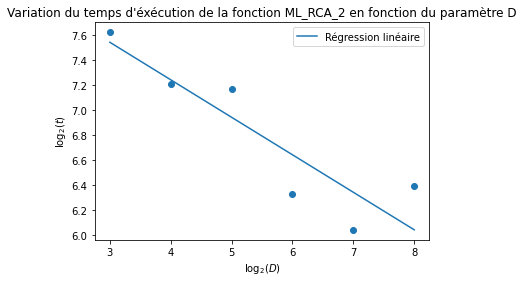

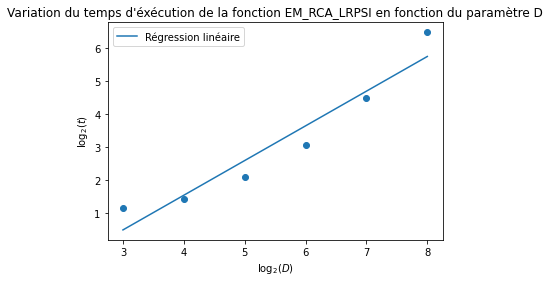

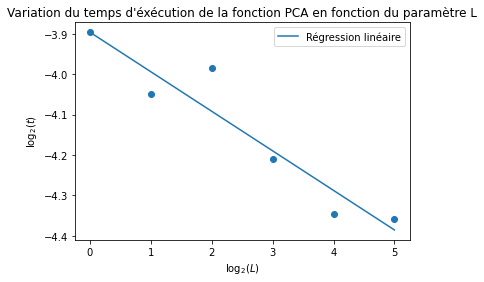

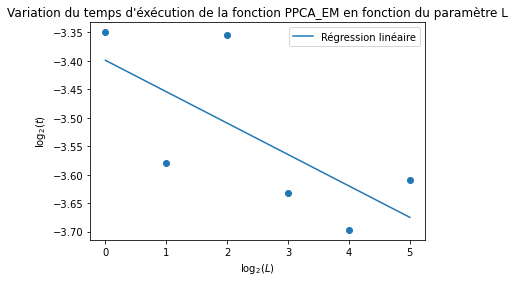

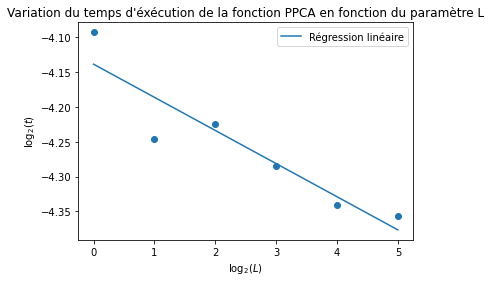

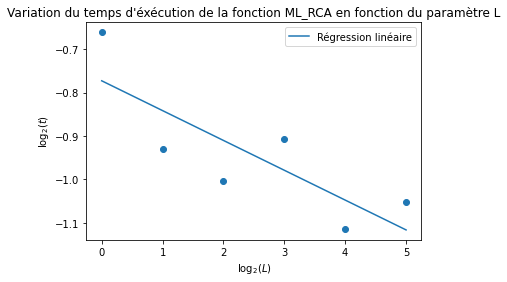

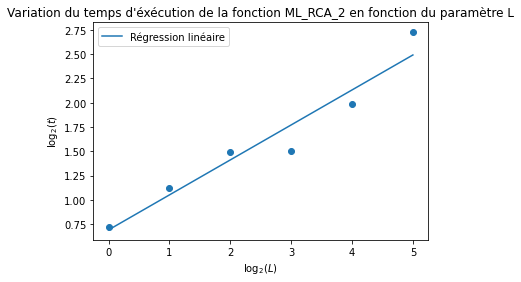

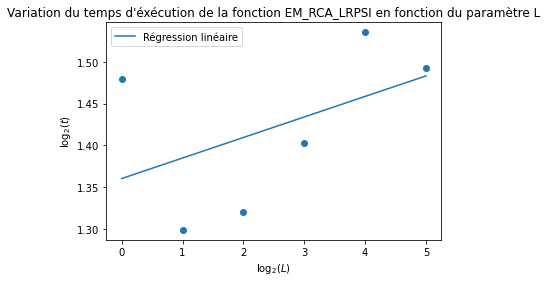

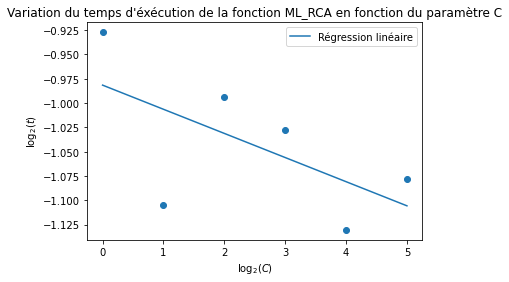

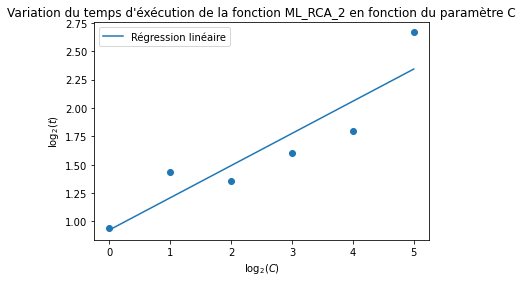

In [28]:
alist = []
blist = []
varlist = ['N','D','L','C']
funlist = ['PCA','PPCA_EM','PPCA','ML_RCA','ML_RCA_2','EM_RCA_LRPSI']

for tlist in timelists :
    
    #Régression linéaire
    n = len(tlist)
    ind_list = timelists.index(tlist)
    ind_var = int(ind_list/6)
    start = 3*int(ind_var < 1) + 3*int(ind_var < 2)
    x = np.arange(start,start+n)
    y = np.log(np.array(tlist))/np.log(2)
    cov = np.mean(x*y)- np.mean(x)*np.mean(y)
    a = cov/np.var(x)
    b = np.mean(y) - a*np.mean(x)
    alist.append(a)
    blist.append(b)
    
    #Représentation graphique
    plt.figure()
    
    plt.scatter(x,y)
    plt.plot([x[0],x[-1]],[a*x[0]+b,a*x[-1]+b],label='Régression linéaire')
    
    plt.xlabel('$\log_2('+str(varlist[ind_var])+')$')
    plt.ylabel('$\log_2(t)$')
    
    if ind_var < 3 :
        plt.title("Variation du temps d'éxécution de la fonction "+funlist[ind_list%6]+" en fonction du paramètre "+varlist[ind_var])
        plt.legend()
        plt.savefig('log(t)_'+funlist[ind_list%6]+'_'+varlist[ind_var]+'.png')
    else :
        plt.title("Variation du temps d'éxécution de la fonction "+funlist[ind_list-15]+" en fonction du paramètre C")
        plt.legend()
        plt.savefig('log(t)_'+funlist[ind_list-15]+'_'+varlist[ind_var]+'.png')
    
    plt.show()

In [29]:
alist

[0.29226980654433826,
 0.3493899254237241,
 0.4149171083780394,
 1.5644020169244868,
 1.9203659310091012,
 0.7667777737158499,
 0.9635491871837457,
 0.9820151385276951,
 1.0237210822796128,
 0.08580909433100115,
 -0.30060827046264815,
 1.0533146420573287,
 -0.09778021768718617,
 -0.055165833803344,
 -0.04758046672768594,
 -0.06862309730670658,
 0.35970682319965347,
 0.024572414856035812,
 -0.024814206899043564,
 0.28337425372518804]